In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

Loading data

In [2]:
data = pd.read_csv('../data/mergedleagues.csv')

In [3]:
data = data.loc[3562:5423,]

In [4]:
data

,Date,Home,xG_Home,xG_Away,Away,Referee,xGA_Home,xGA_Away,Home_Fatigue,Away_Fatigue,Temp,Humidity,Wind,Referee_Bias,G_Home,G_Away,Result
3562,10-08-2018 20:00,Villarreal,1.3,0.8,Real Madrid,Guillermo Cuadra Fernández,0.2,1.7,Moderate,Moderate,Low,High,Low,Home,2,0,Home
3563,11-08-2018 12:30,Atletico Madrid,1.2,0.8,Villarreal,José María Sánchez Martínez,0.4,0.5,Moderate,Moderate,Moderate,High,Moderate,Away,3,1,Home
3564,11-08-2018 15:00,Real Madrid,1.5,1.9,Granada,Carlos Del Cerro Grande,1.4,1.8,Moderate,Moderate,Moderate,Moderate,Moderate,Home,2,3,Away
3565,11-08-2018 15:00,Villarreal,0.9,1.0,Athletic Bilbao,Juan Martínez Munuera,0.7,0.9,Moderate,Moderate,Low,High,Moderate,Away,1,3,Away
3566,11-08-2018 15:00,Villarreal,1.4,1.4,Barcelona,Alejandro Hernández Hernández,1.4,0.6,Moderate,Low,Moderate,High,Moderate,Away,2,0,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5419,28-05-2023 16:30,Alaves,1.7,1.6,Valencia,Guillermo Cuadra Fernández,0.8,0.6,Low,Low,Moderate,Moderate,Moderate,Away,2,2,Draw
5420,28-05-2023 16:30,Villarreal,1.7,0.4,Athletic Bilbao,Carlos Del Cerro Grande,0.9,0.2,Low,Moderate,Low,High,Low,Home,3,1,Home
5421,28-05-2023 16:30,Celta Vigo,0.9,1.3,Cadiz,Guillermo Cuadra Fernández,0.7,2.7,Low,Low,Low,High,Moderate,Away,1,2,Away
5422,28-05-2023 16:30,Getafe,1.2,1.3,Real Betis,Antonio Mateu Lahoz,0.9,0.6,Moderate,Moderate,Low,High,Moderate,Home,0,2,Away


Datatypes of dataset columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 3562 to 5423
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1862 non-null   object 
 1   Home          1862 non-null   object 
 2   xG_Home       1862 non-null   float64
 3   xG_Away       1862 non-null   float64
 4   Away          1862 non-null   object 
 5   Referee       1862 non-null   object 
 6   xGA_Home      1862 non-null   float64
 7   xGA_Away      1862 non-null   float64
 8   Home_Fatigue  1862 non-null   object 
 9   Away_Fatigue  1862 non-null   object 
 10  Temp          1862 non-null   object 
 11  Humidity      1862 non-null   object 
 12  Wind          1862 non-null   object 
 13  Referee_Bias  1862 non-null   object 
 14  G_Home        1862 non-null   int64  
 15  G_Away        1862 non-null   int64  
 16  Result        1862 non-null   object 
dtypes: float64(4), int64(2), object(11)
memory usage: 247.4+ KB


In [6]:
data.describe()

,xG_Home,xG_Away,xGA_Home,xGA_Away,G_Home,G_Away
count,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000
mean,1.476692,1.247691,1.079108,0.898281,1.510741,1.295918
std,0.856146,0.753050,0.687228,0.607916,1.325824,1.237066
min,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,0.800000,0.700000,0.600000,0.500000,1.000000,0.000000
50%,1.400000,1.100000,0.900000,0.800000,1.000000,1.000000
75%,2.000000,1.700000,1.500000,1.200000,2.000000,2.000000
max,5.900000,4.600000,4.400000,3.700000,9.000000,9.000000


Finding any null values

In [7]:
data.isna().sum()

Date            0
Home            0
xG_Home         0
xG_Away         0
Away            0
Referee         0
xGA_Home        0
xGA_Away        0
Home_Fatigue    0
Away_Fatigue    0
Temp            0
Humidity        0
Wind            0
Referee_Bias    0
G_Home          0
G_Away          0
Result          0
dtype: int64

Bar Plot for Expected Goals vs Actual Goals of Top 10 Home Teams

Text(0, 0.5, 'Expected Goal Assists vs Expected Goals Goals')

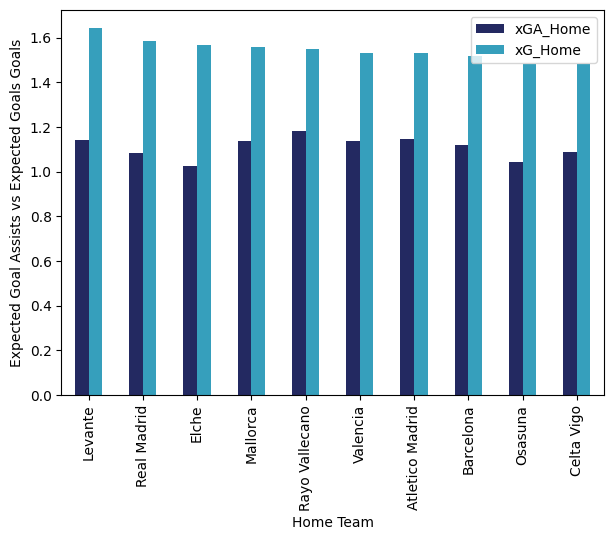

In [8]:
home_team = data.groupby('Home')[['xGA_Home','xG_Home']].mean()
home_team = pd.DataFrame(home_team)
home_team
home_team = home_team.sort_values('xG_Home', ascending=False)
home_team = home_team.reset_index()
home_team.head(10).plot(kind='bar', x='Home', y=['xGA_Home','xG_Home'], figsize=(7,5), color=['#232961','#369fbc'])
plt.xlabel('Home Team')
plt.ylabel('Expected Goal Assists vs Expected Goals Goals')


Bar Plot for Expected Goals vs Actual Goals of Top 10 Away Teams

Text(0, 0.5, 'Expected Goal Assists vs Expected Goals Goals')

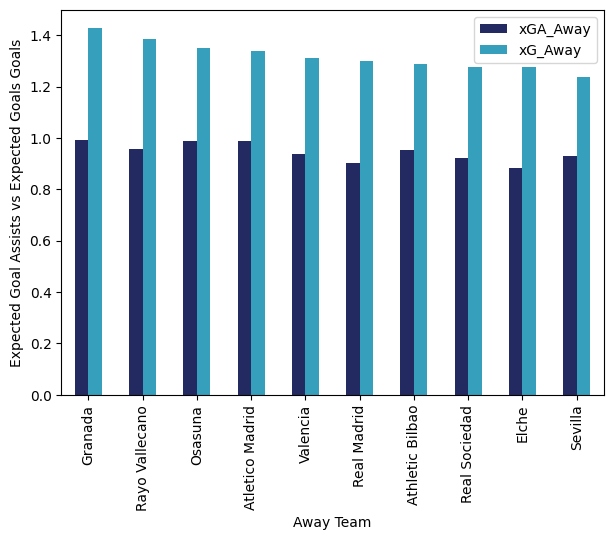

In [9]:

Away_team = data.groupby('Away')[['xGA_Away','xG_Away']].mean()
Away_team = pd.DataFrame(Away_team)
Away_team
Away_team = Away_team.sort_values('xG_Away', ascending=False)
Away_team = Away_team.reset_index()
Away_team.head(10).plot(kind='bar', x='Away', y=['xGA_Away','xG_Away'], figsize=(7,5),color=['#232961','#369fbc'])
plt.xlabel('Away Team')
plt.ylabel('Expected Goal Assists vs Expected Goals Goals')


Scatter plot for Expected Assisted Goals vs Expected Goals of Home Teams

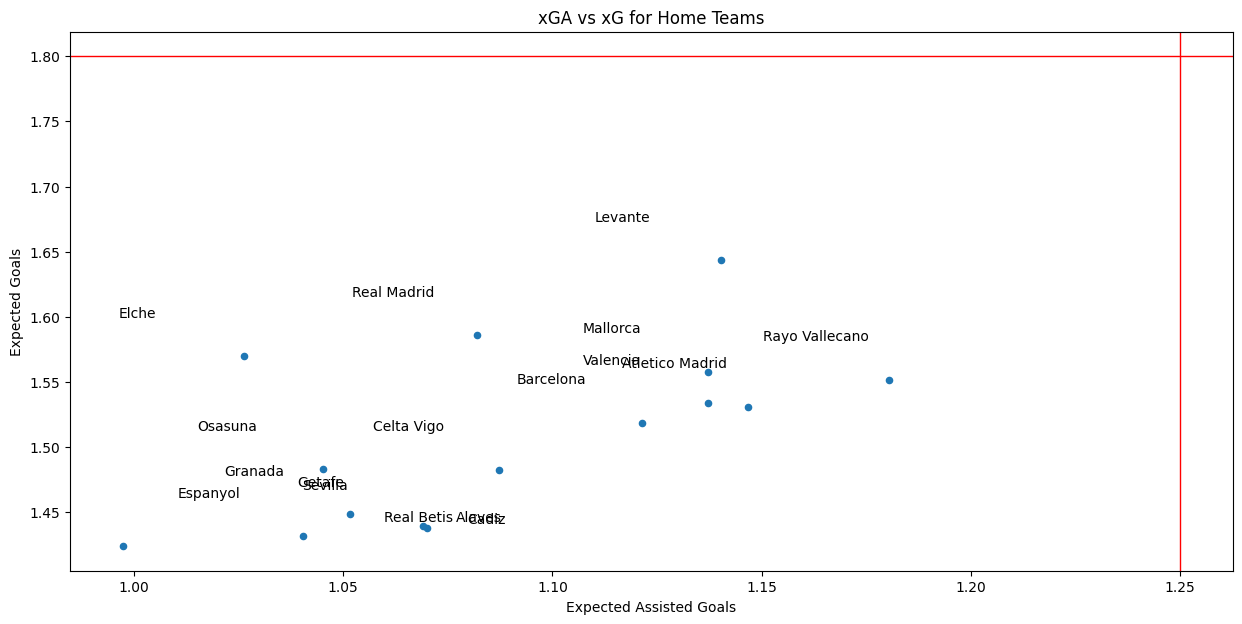

In [10]:


home_team = data.groupby('Home')[['xG_Home','xGA_Home']].mean()
home_team = pd.DataFrame(home_team)
home_team = home_team.sort_values('xG_Home', ascending=False)
home_team = home_team.reset_index()
home_team.head(15).plot(kind='scatter', x='xGA_Home', y='xG_Home', figsize=(15,7))
plt.xlabel('Expected Assisted Goals')
plt.ylabel('Expected Goals')
plt.title('xGA vs xG for Home Teams')
plt.axhline(y=1.8, color='r', linewidth=1)
plt.axvline(x=1.25, color='r', linewidth=1)

for i, txt in enumerate(home_team['Home']):
    plt.annotate(txt, (home_team['xGA_Home'][i] - 0.03, home_team['xG_Home'][i] + 0.03))




Scatter plot for Expected Assisted Goals vs Expected Goals of Away Teams

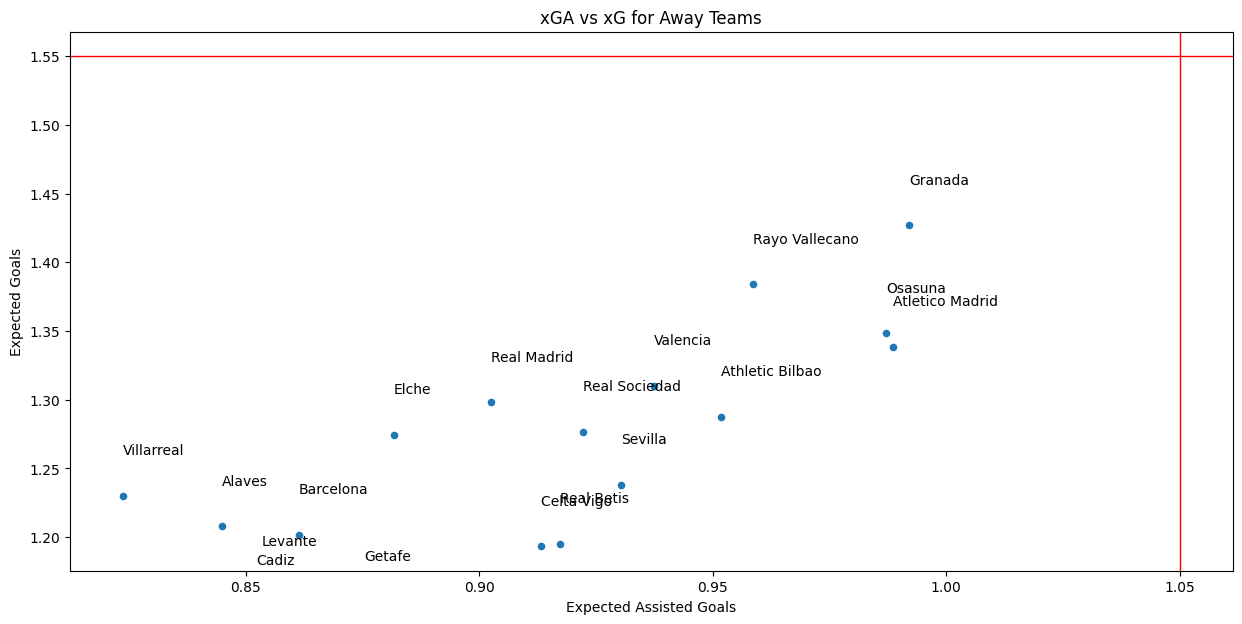

In [11]:

Away_team = data.groupby('Away')[['xG_Away','xGA_Away']].mean()
Away_team = pd.DataFrame(Away_team)
Away_team = Away_team.sort_values('xG_Away', ascending=False)
Away_team = Away_team.reset_index()
Away_team.head(15).plot(kind='scatter', x='xGA_Away', y='xG_Away', figsize=(15,7))
plt.xlabel('Expected Assisted Goals')
plt.ylabel('Expected Goals')
plt.title('xGA vs xG for Away Teams')
plt.axhline(y=1.55, color='r', linewidth=1)
plt.axvline(x=1.05, color='r', linewidth=1)


for i, txt in enumerate(Away_team['Away']):
    plt.annotate(txt, (Away_team['xGA_Away'][i], Away_team['xG_Away'][i] + 0.03))

Pie chart for referee bias value count

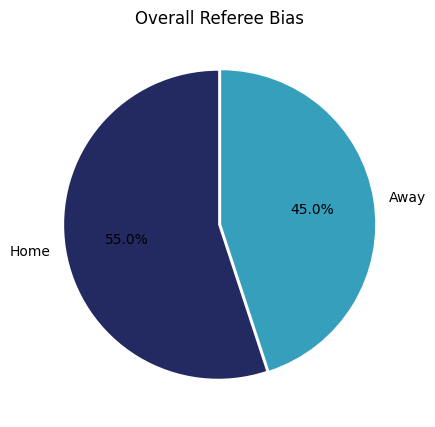

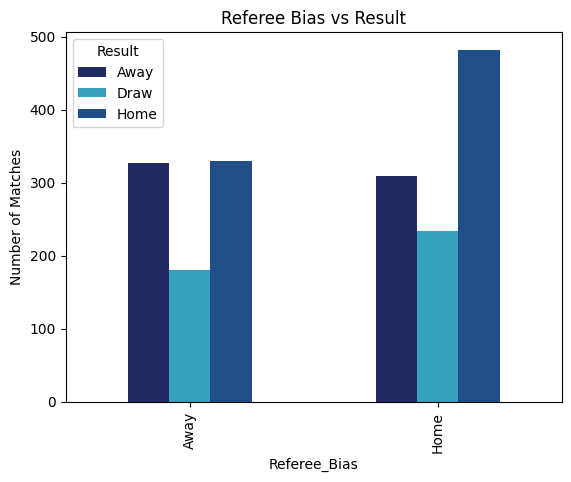

In [12]:

plt.figure(figsize=(10,5))
plt.pie(data['Referee_Bias'].value_counts(), labels=['Home','Away'], autopct='%1.1f%%', startangle=90,colors=['#232961','#369fbc'],explode=[0.01, 0.01])
plt.title('Overall Referee Bias')
crosstab = pd.crosstab(data['Referee_Bias'],data['Result'])
crosstab.plot.bar(color = ['#232961','#369fbc','#204e87'])
plt.title('Referee Bias vs Result')
plt.ylabel('Number of Matches')
plt.show()

Pie chart for home fatigue and away fatigue value count 

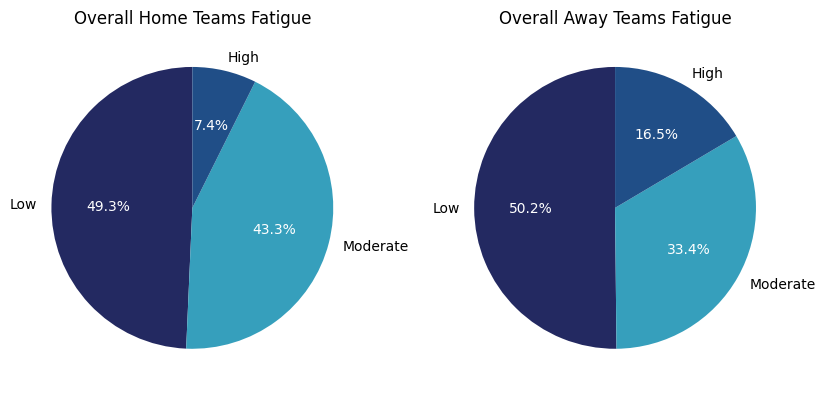

In [13]:


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
patches, texts, autotexts = plt.pie(data['Home_Fatigue'].value_counts(), labels=['Low','Moderate','High'], autopct='%1.1f%%',startangle=90,colors=['#232961','#369fbc','#204e87'])
plt.title('Overall Home Teams Fatigue')
[autotext.set_color('white') for autotext in autotexts]
plt.subplot(1,2,2)
patches, texts, autotexts = plt.pie(data['Away_Fatigue'].value_counts(), labels=['Low','Moderate','High'], autopct='%1.1f%%', startangle=90,colors=['#232961','#369fbc','#204e87'])
plt.title('Overall Away Teams Fatigue')
[autotext.set_color('white') for autotext in autotexts]
plt.show()



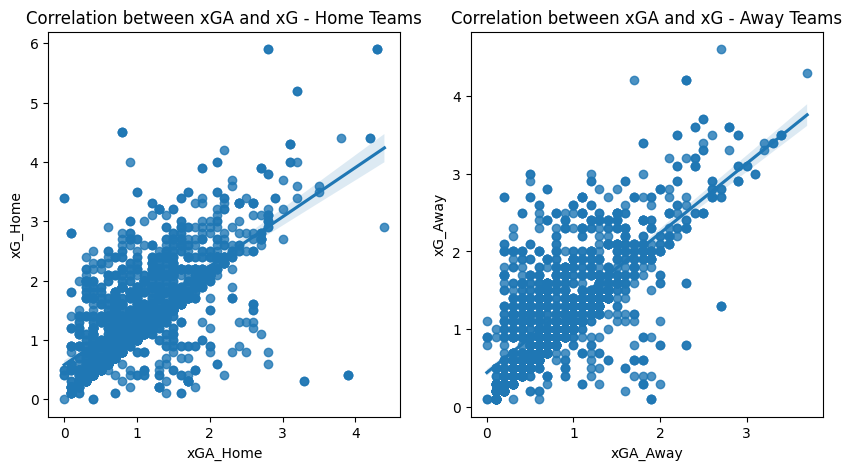

          xGA_Home   xG_Home
xGA_Home  1.000000  0.667164
xG_Home   0.667164  1.000000
          xGA_Away   xG_Away
xGA_Away  1.000000  0.722886
xG_Away   0.722886  1.000000


In [14]:
#correlation between expected home goals and actual home goals
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(x='xGA_Home', y='xG_Home', data=data)
plt.title('Correlation between xGA and xG - Home Teams')
plt.subplot(1,2,2)
sns.regplot(x='xGA_Away', y='xG_Away', data=data)
plt.title('Correlation between xGA and xG - Away Teams')
plt.show()

#correlation coeffieient between expected home goals and expected home goals
correlation1 = data[['xGA_Home','xG_Home']].corr()
print(correlation1)

#correlation coeffieient between expected away goals and actual away goals
correlation2 = data[['xGA_Away','xG_Away']].corr()
print(correlation2)

In [15]:
# plt.figure(figsize=(13,5))
# plt.subplot(1,3,1)
# sns.swarmplot(x="Temp", y="xG_Away", hue="Temp" ,data=data)
# plt.subplot(1,3,2)
# sns.swarmplot(x="Temp", y="xG_Home", hue="Temp" ,data=data)
# plt.show()




In [16]:
# plt.figure(figsize=(13,5))
# plt.subplot(1,3,1)
# sns.swarmplot(x="Humidity", y="xG_Away", hue="Humidity" ,data=data)
# plt.subplot(1,3,2)
# sns.swarmplot(x="Humidity", y="xG_Home", hue="Humidity" ,data=data)
# plt.show()




In [17]:
# plt.figure(figsize=(13,5))
# plt.subplot(1,3,1)
# sns.swarmplot(x="Wind", y="xG_Away", hue="Wind" ,data=data)
# plt.subplot(1,3,2)
# sns.swarmplot(x="Wind", y="xG_Home", hue="Wind" ,data=data)
# plt.show()




In [18]:



# # Subplot for xG_Home
# fig, axes = plt.subplots(2, 1,figsize=(12, 8))
# sns.pointplot(x='Referee_Bias', y='xG_Home', data=data,  ci='sd', ax=axes[0])
# # plt.title('xG_Home by Referee_Bias')
# # plt.xlabel('Referee_Bias')
# # plt.ylabel('xG_Home')

# # Subplot for xG_Away
# sns.pointplot(x='Referee_Bias', y='xGA_Home', data=data,  ci='sd', ax=axes[1])
# # plt.title('xG_Away by Result')
# # plt.xlabel('Result')
# # plt.ylabel('xG_Away')

# # sns.pointplot(x='Result', y='xGA_Away', data=data,  ci='sd', ax=axes[1,0])
# # # plt.title('xGA_Away by Result')
# # # plt.xlabel('Result')
# # # plt.ylabel('xGA_Away')


# # sns.pointplot(x='Result', y='xGA_Home', data=data,  ci='sd', ax=axes[1,1])
# # # plt.title('xGA_Home by Result')
# # # plt.xlabel('Result')
# # # plt.ylabel('xGA_Home')




In [19]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = data
num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:
        model = ols(f'{home_level} ~ Referee_Bias', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Referee_Bias']
        p_value = anova_results['PR(>F)']['Referee_Bias']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\4001309981.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\4001309981.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\4001309981.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

,Variable,F-Statistic,P-Value,eta
0,xG_Home,14.359747,0.000156,0.007661
0,xG_Away,0.921476,0.337213,0.000495
0,xGA_Home,4.399732,0.036079,0.002360
0,xGA_Away,2.295024,0.129959,0.001232


In [20]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = data


num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:

        model = ols(f'{home_level} ~ Home_Fatigue', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Home_Fatigue']
        p_value = anova_results['PR(>F)']['Home_Fatigue']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\2796385453.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\2796385453.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\2796385453.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

,Variable,F-Statistic,P-Value,eta
0,xG_Home,0.421749,0.655961,0.000454
0,xG_Away,0.474381,0.622345,0.000510
0,xGA_Home,2.286506,0.101907,0.002454
0,xGA_Away,1.309043,0.270327,0.001406


In [21]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = data


num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:

        model = ols(f'{home_level} ~ Away_Fatigue', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Away_Fatigue']
        p_value = anova_results['PR(>F)']['Away_Fatigue']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\2577399383.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\2577399383.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\2577399383.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

,Variable,F-Statistic,P-Value,eta
0,xG_Home,2.268184,0.103786,0.002434
0,xG_Away,5.376360,0.004697,0.005751
0,xGA_Home,0.558489,0.572169,0.000600
0,xGA_Away,1.795069,0.166404,0.001927


In [22]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = data


num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:

        model = ols(f'{home_level} ~ Temp', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Temp']
        p_value = anova_results['PR(>F)']['Temp']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\3831054091.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\3831054091.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\3831054091.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

,Variable,F-Statistic,P-Value,eta
0,xG_Home,0.422486,0.655479,0.000454
0,xG_Away,8.780410,0.000160,0.009358
0,xGA_Home,0.774821,0.460935,0.000833
0,xGA_Away,5.836877,0.002972,0.006240


In [23]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = data


num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:

        model = ols(f'{home_level} ~ Humidity', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Humidity']
        p_value = anova_results['PR(>F)']['Humidity']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\1208712932.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\1208712932.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\1208712932.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

,Variable,F-Statistic,P-Value,eta
0,xG_Home,3.506695,0.030194,0.003758
0,xG_Away,0.089598,0.914303,0.000096
0,xGA_Home,3.680375,0.025397,0.003944
0,xGA_Away,3.081914,0.046106,0.003305


In [24]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = data


num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:

        model = ols(f'{home_level} ~ Wind', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Wind']
        p_value = anova_results['PR(>F)']['Wind']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\1808189195.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\1808189195.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\1808189195.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

,Variable,F-Statistic,P-Value,eta
0,xG_Home,0.555253,0.574022,0.000597
0,xG_Away,0.530241,0.588552,0.000570
0,xGA_Home,0.835301,0.433907,0.000898
0,xGA_Away,0.678705,0.507399,0.000730


In [25]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Referee_Bias']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Referee Bias.")
else:
    print("There is no significant association between Football Result and Referee Bias.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

# contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

Result        Away  Draw  Home
Referee_Bias                  
Away           327   181   329
Home           309   234   482


Chi-square statistic: 17.337476582337764
P-value: 0.00017187582472260547

Significance Test:
There is a significant association between Football Result and Referee Bias.


Result        Away  Draw  Home
Home_Fatigue                  
High            41    25    71
Low            321   202   395
Moderate       274   188   345


Chi-square statistic: 4.637713233750985
P-value: 0.32652907432187445

Significance Test:
There is no significant association between Football Result and Home_Fatigue.


<Axes: xlabel='Home_Fatigue'>

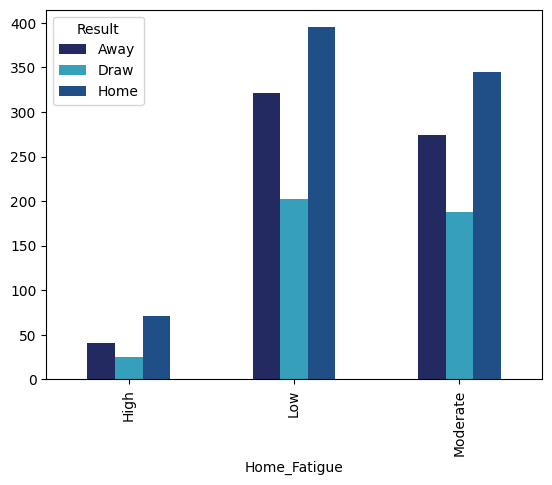

In [26]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Home_Fatigue']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Home_Fatigue.")
else:
    print("There is no significant association between Football Result and Home_Fatigue.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

In [27]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Away_Fatigue']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Away_Fatigue.")
else:
    print("There is no significant association between Football Result and Away_Fatigue.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

# contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

Result        Away  Draw  Home
Away_Fatigue                  
High            82    68   157
Low            204   152   265
Moderate       350   195   389


Chi-square statistic: 15.417833319070576
P-value: 0.003908626461442551

Significance Test:
There is a significant association between Football Result and Away_Fatigue.


In [28]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Temp']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Temperature.")
else:
    print("There is no significant association between Football Result and Temperature.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

# contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

Result    Away  Draw  Home
Temp                      
High         5     5    13
Low        256   165   355
Moderate   375   245   443


Chi-square statistic: 4.9904190276424805
P-value: 0.28828197637479297

Significance Test:
There is no significant association between Football Result and Temperature.


In [29]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Humidity']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Humidity.")
else:
    print("There is no significant association between Football Result and Humidity.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

# contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

Result    Away  Draw  Home
Humidity                  
High       369   244   478
Low         15    13    33
Moderate   252   158   300


Chi-square statistic: 3.920322573953779
P-value: 0.416896399172518

Significance Test:
There is no significant association between Football Result and Humidity.


In [30]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Wind']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Wind.")
else:
    print("There is no significant association between Football Result and Wind.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

# contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

Result    Away  Draw  Home
Wind                      
High        37    36    37
Low        311   241   421
Moderate   288   138   353


Chi-square statistic: 21.616276396605382
P-value: 0.00023892778016772746

Significance Test:
There is a significant association between Football Result and Wind.


In [31]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest


df = data


fatigue_levels = ["Low", "Moderate", "High"]

z_test_results = pd.DataFrame(columns=['Home_Fatigue','Away_Fatigue','Z-Statistic', 'P-Value','Significant Difference'])

for home_level in fatigue_levels:
    for away_level in fatigue_levels:

        home_data = df[df["Home_Fatigue"] == home_level]["xG_Home"]
        away_data = df[df["Away_Fatigue"] == away_level]["xG_Away"]


        z_stat, p_value = ztest(home_data, away_data)
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        
        new_row = pd.DataFrame([{'Home_Fatigue':home_level,'Away_Fatigue':away_level,'Z-Statistic': z_stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
        z_test_results = pd.concat([z_test_results, new_row])

z_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\3194791706.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  z_test_results = pd.concat([z_test_results, new_row])


,Home_Fatigue,Away_Fatigue,Z-Statistic,P-Value,Significant Difference
0,Low,Low,5.975632,2.292000e-09,Yes
0,Low,Moderate,4.386511,1.151833e-05,Yes
0,Low,High,6.213264,5.189503e-10,Yes
0,Moderate,Low,6.205243,5.461231e-10,Yes
0,Moderate,Moderate,4.906238,9.283994e-07,Yes
0,Moderate,High,6.174147,6.652171e-10,Yes
0,High,Low,3.335828,8.504562e-04,Yes
0,High,Moderate,2.314575,2.063623e-02,Yes
0,High,High,4.039790,5.349919e-05,Yes


C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\3520716755.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)
C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\3520716755.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, j].boxplot([home_data, away_data], labels=['Home', 'Away'])
C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\3520716755.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, j].boxplot([home_data, 

  Home_Fatigue Away_Fatigue            Test Type  Statistic       P-Value  \
0          Low          Low  Mann-Whitney U Test   339016.5  2.679790e-10   
1          Low     Moderate  Mann-Whitney U Test   482019.0  3.527770e-06   
2          Low         High  Mann-Whitney U Test   173382.5  1.392279e-09   
3     Moderate          Low  Mann-Whitney U Test   296947.5  1.874815e-09   
4     Moderate     Moderate  Mann-Whitney U Test   422639.5  1.190377e-05   
5     Moderate         High  Mann-Whitney U Test   151793.0  5.745518e-09   
6         High          Low  Mann-Whitney U Test    48111.5  1.618251e-02   
7         High     Moderate  Mann-Whitney U Test    68633.0  1.682873e-01   
8         High         High  Mann-Whitney U Test    24496.0  5.461785e-03   

  Significant Difference  
0                    Yes  
1                    Yes  
2                    Yes  
3                    Yes  
4                    Yes  
5                    Yes  
6                    Yes  
7            

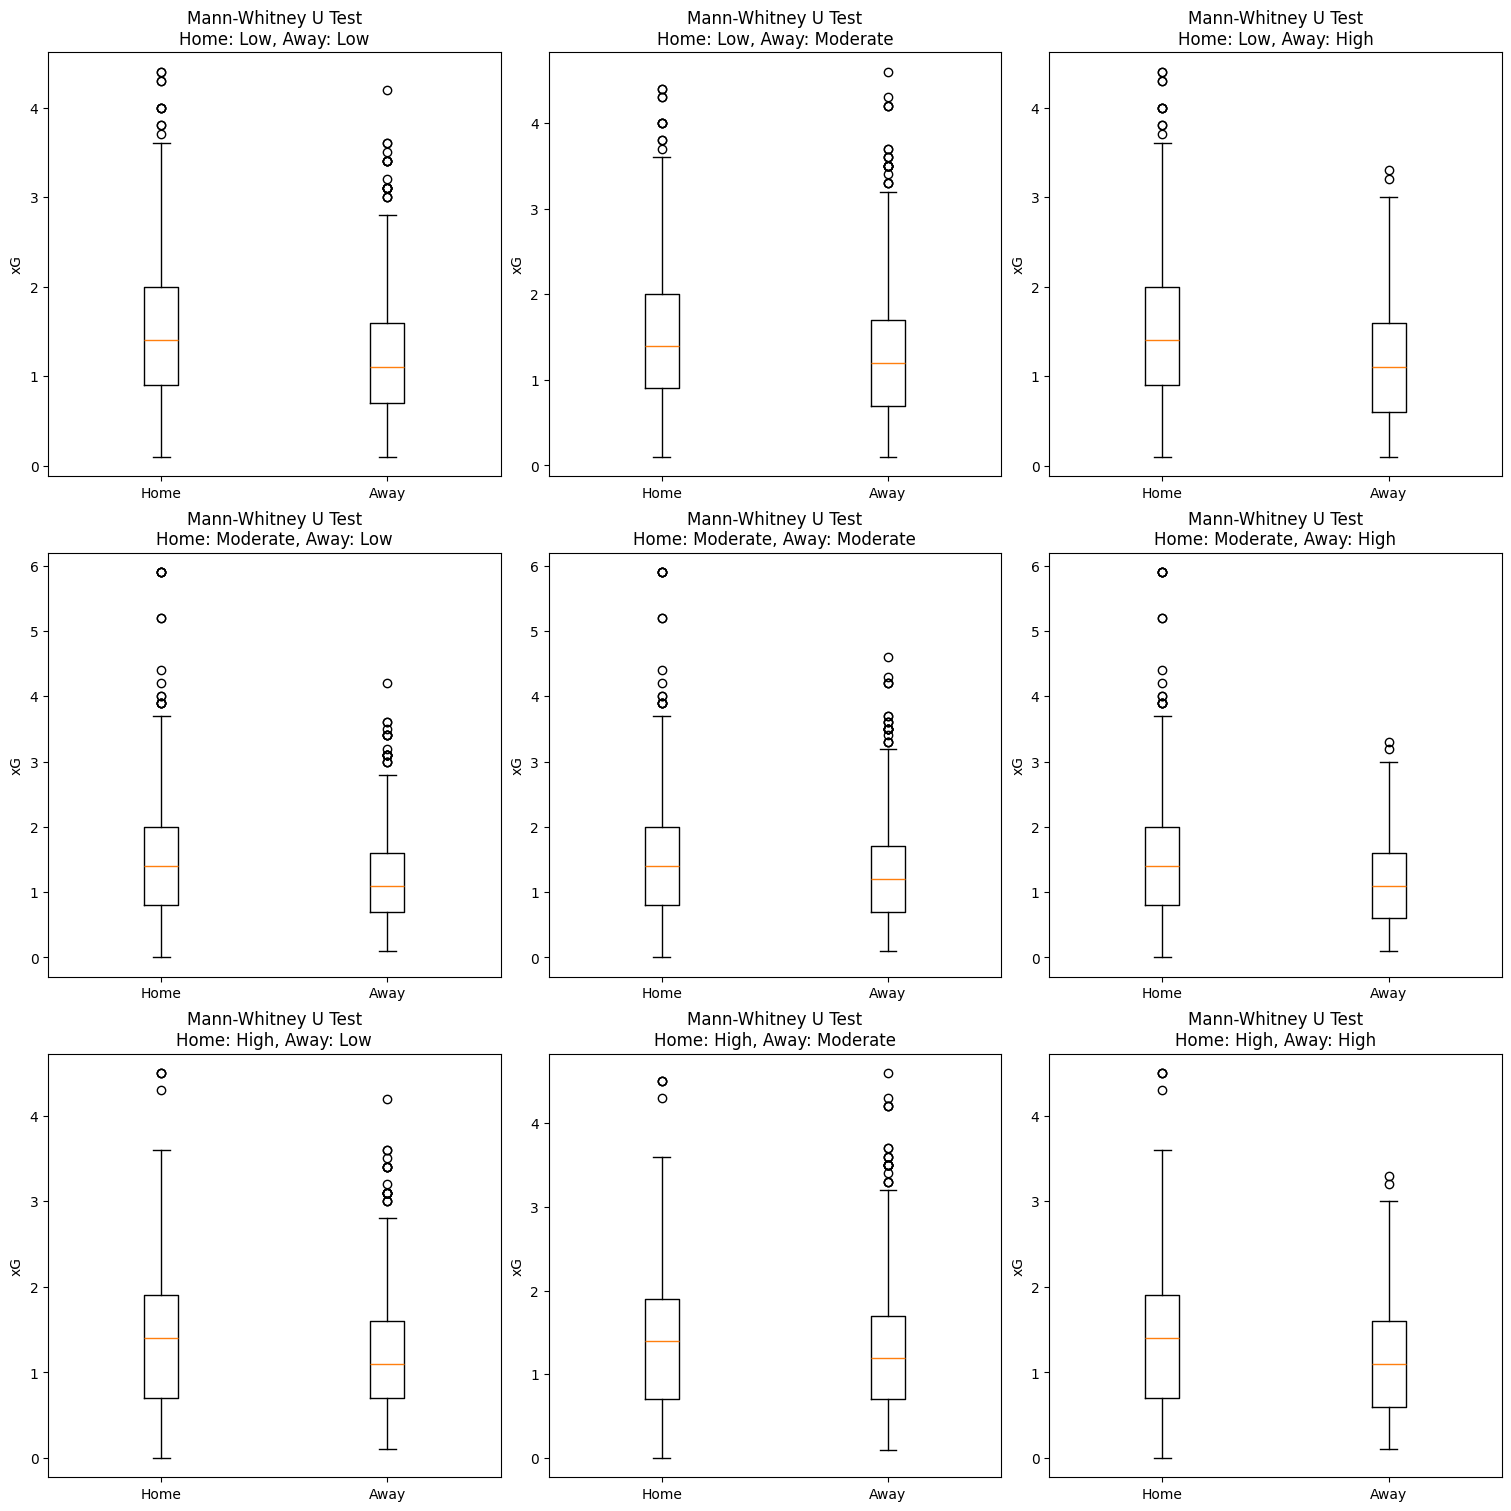

In [32]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
fatigue_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Home_Fatigue', 'Away_Fatigue', 'Test Type', 'Statistic', 'P-Value', 'Significant Difference'])

fig, axes = plt.subplots(nrows=len(fatigue_levels), ncols=len(fatigue_levels), figsize=(15, 15), constrained_layout=True)

for i, home_level in enumerate(fatigue_levels):
    for j, away_level in enumerate(fatigue_levels):
        home_data = df[df["Home_Fatigue"] == home_level]["xG_Home"]
        away_data = df[df["Away_Fatigue"] == away_level]["xG_Away"]

        # Check for normality
        home_normality = normaltest(home_data)
        away_normality = normaltest(away_data)

        if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
            # Perform z-test if both samples are normally distributed
            test_type = 'Z-Test'
            z_stat, p_value = ztest(home_data, away_data)
            stat = z_stat
        else:
            # Perform Mann-Whitney U test if at least one sample is not normally distributed
            test_type = 'Mann-Whitney U Test'
            u_stat, p_value = mannwhitneyu(home_data, away_data)
            stat = u_stat

        significant_diff = "Yes" if p_value < 0.05 else "No"

        new_row = pd.DataFrame([{'Home_Fatigue': home_level, 'Away_Fatigue': away_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
        results = pd.concat([results, new_row], ignore_index=True)

        # Plot the data
        axes[i, j].boxplot([home_data, away_data], labels=['Home', 'Away'])
        axes[i, j].set_title(f'{test_type}\nHome: {home_level}, Away: {away_level}')
        axes[i, j].set_ylabel('xG')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\2867954313.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)
C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\2867954313.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, j].boxplot([home_data, away_data], labels=['Home', 'Away'])
C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\2867954313.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, j].boxplot([home_data, 

  Home_Fatigue Away_Fatigue            Test Type  Statistic       P-Value  \
0          Low          Low  Mann-Whitney U Test   345306.5  1.694304e-12   
1          Low     Moderate  Mann-Whitney U Test   497541.0  2.082839e-09   
2          Low         High  Mann-Whitney U Test   170976.5  2.004232e-08   
3     Moderate          Low  Mann-Whitney U Test   295095.0  7.821368e-09   
4     Moderate     Moderate  Mann-Whitney U Test   425562.0  3.131790e-06   
5     Moderate         High  Mann-Whitney U Test   146043.0  3.701184e-06   
6         High          Low  Mann-Whitney U Test    45171.5  2.554692e-01   
7         High     Moderate  Mann-Whitney U Test    65025.0  7.567532e-01   
8         High         High  Mann-Whitney U Test    22270.5  3.194904e-01   

  Significant Difference  
0                    Yes  
1                    Yes  
2                    Yes  
3                    Yes  
4                    Yes  
5                    Yes  
6                     No  
7            

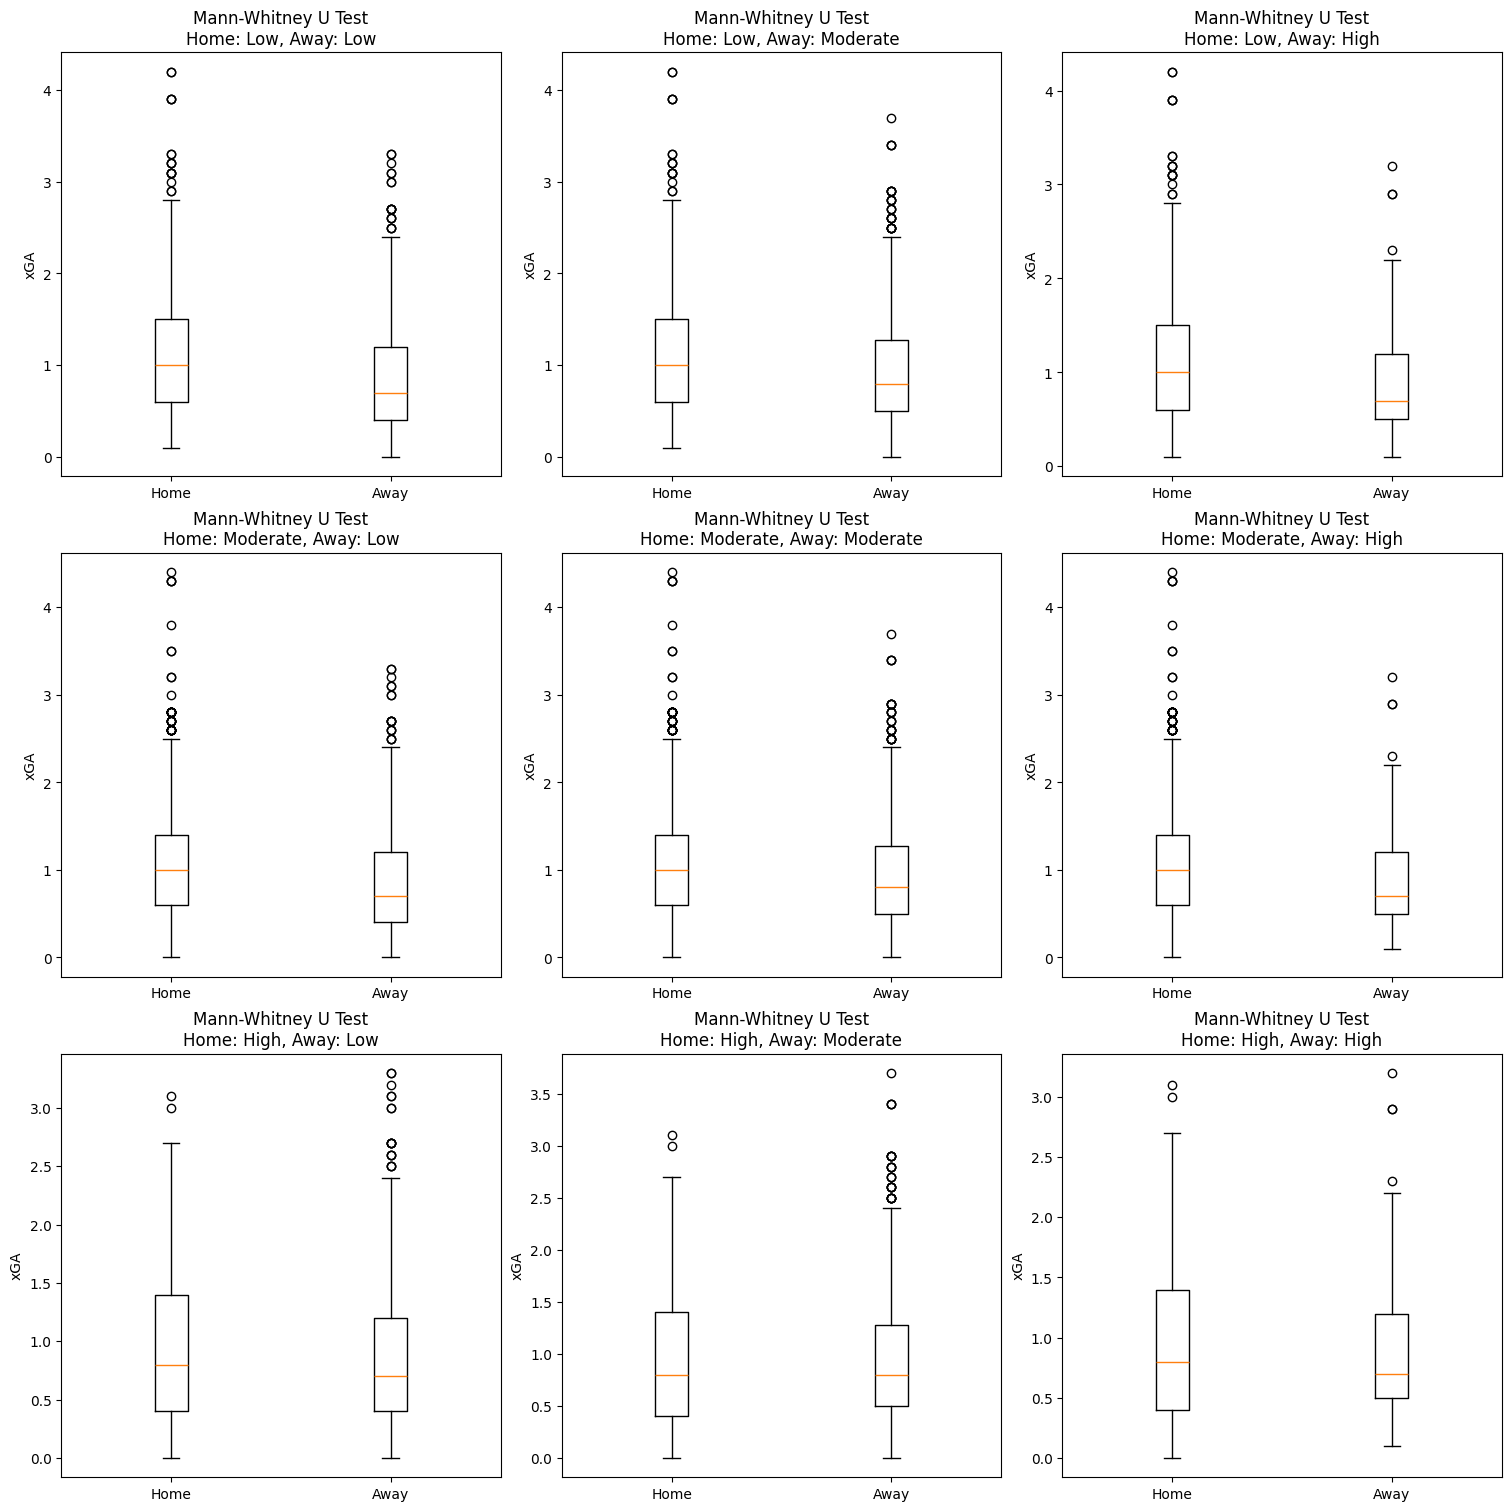

In [33]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt



fatigue_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Home_Fatigue', 'Away_Fatigue', 'Test Type', 'Statistic', 'P-Value', 'Significant Difference'])

fig, axes = plt.subplots(nrows=len(fatigue_levels), ncols=len(fatigue_levels), figsize=(15, 15), constrained_layout=True)

for i, home_level in enumerate(fatigue_levels):
    for j, away_level in enumerate(fatigue_levels):
        home_data = df[df["Home_Fatigue"] == home_level]["xGA_Home"]
        away_data = df[df["Away_Fatigue"] == away_level]["xGA_Away"]

        # Check for normality
        home_normality = normaltest(home_data)
        away_normality = normaltest(away_data)

        if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
            # Perform z-test if both samples are normally distributed
            test_type = 'Z-Test'
            z_stat, p_value = ztest(home_data, away_data)
            stat = z_stat
        else:
            # Perform Mann-Whitney U test if at least one sample is not normally distributed
            test_type = 'Mann-Whitney U Test'
            u_stat, p_value = mannwhitneyu(home_data, away_data)
            stat = u_stat

        significant_diff = "Yes" if p_value < 0.05 else "No"

        new_row = pd.DataFrame([{'Home_Fatigue': home_level, 'Away_Fatigue': away_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
        results = pd.concat([results, new_row], ignore_index=True)

        # Plot the data
        axes[i, j].boxplot([home_data, away_data], labels=['Home', 'Away'])
        axes[i, j].set_title(f'{test_type}\nHome: {home_level}, Away: {away_level}')
        axes[i, j].set_ylabel('xGA')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\3113352540.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


  Humidity            Test Type     Statistic       P-Value  \
0      NaN  Mann-Whitney U Test  365348.00000  3.063410e-13   
1      NaN  Mann-Whitney U Test  630601.00000  3.427345e-06   
2      NaN               Z-Test       2.50063  1.239727e-02   

  Significant Difference      Temp  
0                    Yes       Low  
1                    Yes  Moderate  
2                    Yes      High  


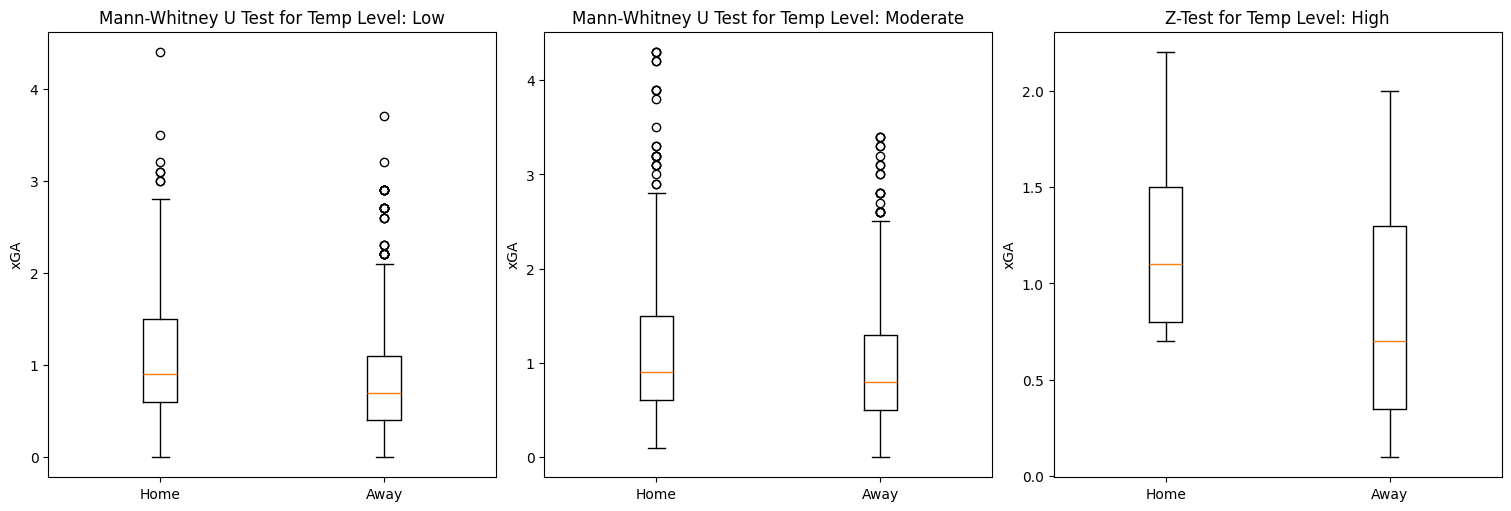

In [34]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
Temp_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Humidity','Test Type', 'Statistic', 'P-Value','Significant Difference'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True)

for i, home_level in enumerate(Temp_levels):
    home_data = df[df["Temp"] == home_level]["xGA_Home"]
    away_data = df[df["Temp"] == home_level]["xGA_Away"]

    # Check for normality
    home_normality = normaltest(home_data)
    away_normality = normaltest(away_data)

    if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
        # Perform z-test if both samples are normally distributed
        test_type = 'Z-Test'
        z_stat, p_value = ztest(home_data, away_data)
        stat = z_stat
    else:
        # Perform Mann-Whitney U test if at least one sample is not normally distributed
        test_type = 'Mann-Whitney U Test'
        u_stat, p_value = mannwhitneyu(home_data, away_data)
        stat = u_stat

    significant_diff = "Yes" if p_value < 0.05 else "No"

    new_row = pd.DataFrame([{'Temp': home_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
    results = pd.concat([results, new_row], ignore_index=True)

    # Plot the data
    axes[i].boxplot([home_data, away_data], tick_labels=['Home', 'Away'])
    axes[i].set_title(f'{test_type} for Temp Level: {home_level}')
    axes[i].set_ylabel('xGA')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\2281937181.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


   Humidity            Test Type      Statistic       P-Value  \
0       Low               Z-Test       2.182616  2.906411e-02   
1  Moderate  Mann-Whitney U Test  299824.000000  6.073608e-10   
2      High  Mann-Whitney U Test  673971.500000  8.219835e-08   

  Significant Difference  
0                    Yes  
1                    Yes  
2                    Yes  


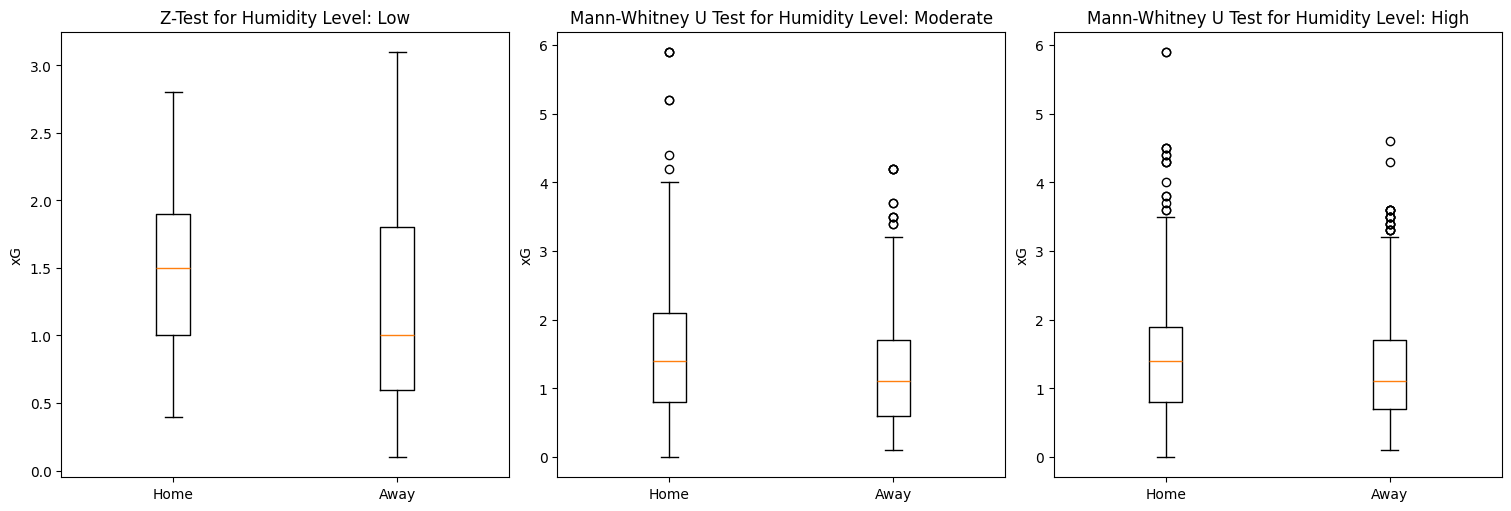

In [35]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
Temp_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Humidity','Test Type', 'Statistic', 'P-Value','Significant Difference'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True)

for i, home_level in enumerate(Temp_levels):
    home_data = df[df["Humidity"] == home_level]["xG_Home"]
    away_data = df[df["Humidity"] == home_level]["xG_Away"]

    # Check for normality
    home_normality = normaltest(home_data)
    away_normality = normaltest(away_data)

    if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
        # Perform z-test if both samples are normally distributed
        test_type = 'Z-Test'
        z_stat, p_value = ztest(home_data, away_data)
        stat = z_stat
    else:
        # Perform Mann-Whitney U test if at least one sample is not normally distributed
        test_type = 'Mann-Whitney U Test'
        u_stat, p_value = mannwhitneyu(home_data, away_data)
        stat = u_stat

    significant_diff = "Yes" if p_value < 0.05 else "No"

    new_row = pd.DataFrame([{'Humidity': home_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
    results = pd.concat([results, new_row], ignore_index=True)

    # Plot the data
    axes[i].boxplot([home_data, away_data], tick_labels=['Home', 'Away'])
    axes[i].set_title(f'{test_type} for Humidity Level: {home_level}')
    axes[i].set_ylabel('xG')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\1647458132.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


   Humidity            Test Type  Statistic       P-Value  \
0       Low  Mann-Whitney U Test     2800.5  1.418535e-06   
1  Moderate  Mann-Whitney U Test   293993.5  5.425199e-08   
2      High  Mann-Whitney U Test   676650.5  2.882872e-08   

  Significant Difference  
0                    Yes  
1                    Yes  
2                    Yes  


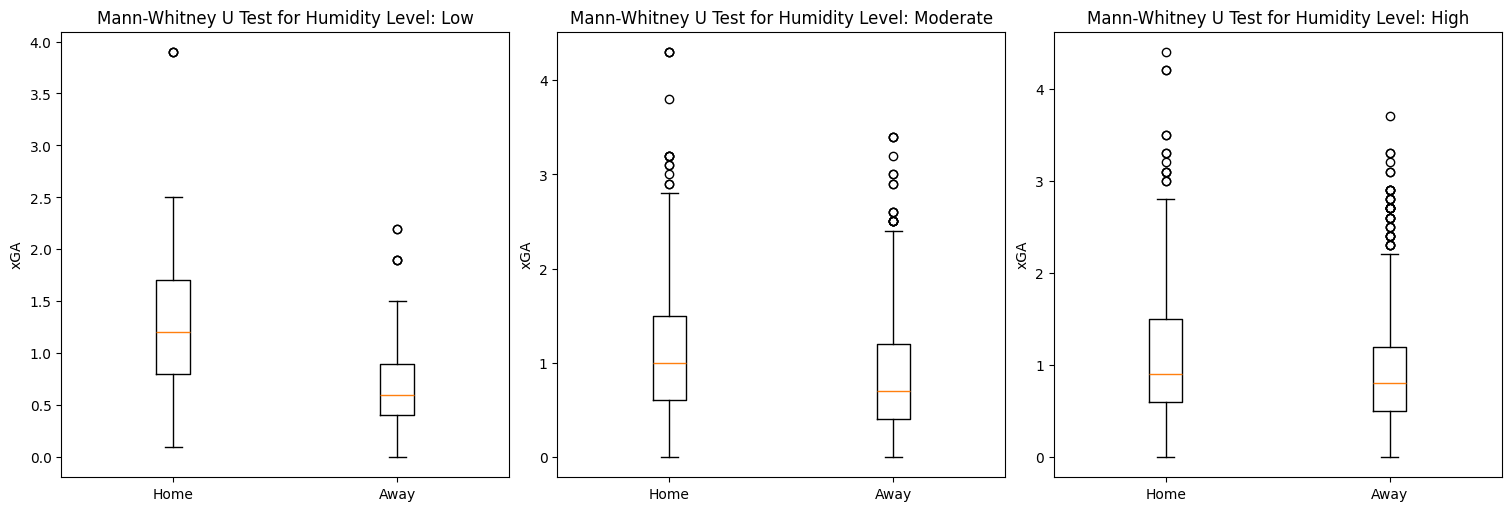

In [36]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
Temp_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Humidity','Test Type', 'Statistic', 'P-Value','Significant Difference'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True)

for i, home_level in enumerate(Temp_levels):
    home_data = df[df["Humidity"] == home_level]["xGA_Home"]
    away_data = df[df["Humidity"] == home_level]["xGA_Away"]

    # Check for normality
    home_normality = normaltest(home_data)
    away_normality = normaltest(away_data)

    if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
        # Perform z-test if both samples are normally distributed
        test_type = 'Z-Test'
        z_stat, p_value = ztest(home_data, away_data)
        stat = z_stat
    else:
        # Perform Mann-Whitney U test if at least one sample is not normally distributed
        test_type = 'Mann-Whitney U Test'
        u_stat, p_value = mannwhitneyu(home_data, away_data)
        stat = u_stat

    significant_diff = "Yes" if p_value < 0.05 else "No"

    new_row = pd.DataFrame([{'Humidity': home_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
    results = pd.concat([results, new_row], ignore_index=True)

    # Plot the data
    axes[i].boxplot([home_data, away_data], tick_labels=['Home', 'Away'])
    axes[i].set_title(f'{test_type} for Humidity Level: {home_level}')
    axes[i].set_ylabel('xGA')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\3640864810.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


  Humidity            Test Type  Statistic       P-Value  \
0      NaN  Mann-Whitney U Test   549183.0  9.199227e-10   
1      NaN  Mann-Whitney U Test   352328.5  3.515502e-08   
2      NaN  Mann-Whitney U Test     6743.5  1.416475e-01   

  Significant Difference      Wind  
0                    Yes       Low  
1                    Yes  Moderate  
2                     No      High  


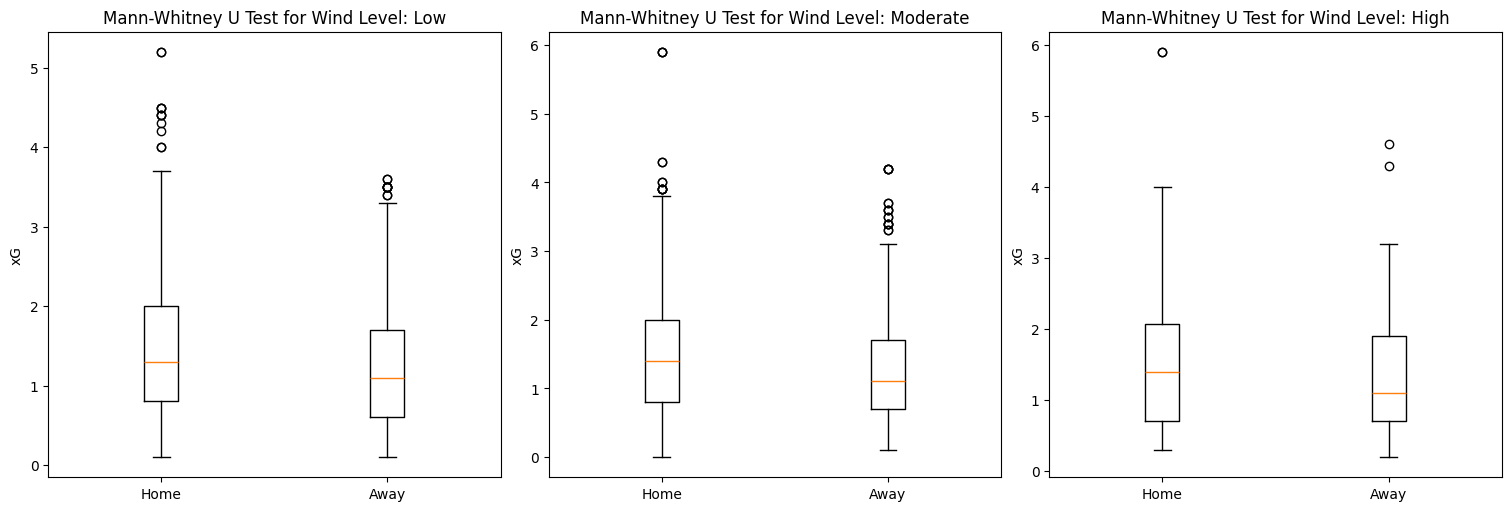

In [37]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
Temp_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Humidity','Test Type', 'Statistic', 'P-Value','Significant Difference'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True)

for i, home_level in enumerate(Temp_levels):
    home_data = df[df["Wind"] == home_level]["xG_Home"]
    away_data = df[df["Wind"] == home_level]["xG_Away"]

    # Check for normality
    home_normality = normaltest(home_data)
    away_normality = normaltest(away_data)

    if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
        # Perform z-test if both samples are normally distributed
        test_type = 'Z-Test'
        z_stat, p_value = ztest(home_data, away_data)
        stat = z_stat
    else:
        # Perform Mann-Whitney U test if at least one sample is not normally distributed
        test_type = 'Mann-Whitney U Test'
        u_stat, p_value = mannwhitneyu(home_data, away_data)
        stat = u_stat

    significant_diff = "Yes" if p_value < 0.05 else "No"

    new_row = pd.DataFrame([{'Wind': home_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
    results = pd.concat([results, new_row], ignore_index=True)

    # Plot the data
    axes[i].boxplot([home_data, away_data], tick_labels=['Home', 'Away'])
    axes[i].set_title(f'{test_type} for Wind Level: {home_level}')
    axes[i].set_ylabel('xG')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_19812\2676737873.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


  Humidity            Test Type  Statistic       P-Value  \
0      NaN  Mann-Whitney U Test   558899.5  4.774536e-12   
1      NaN  Mann-Whitney U Test   341257.0  1.971638e-05   
2      NaN  Mann-Whitney U Test     7500.5  2.084694e-03   

  Significant Difference      Wind  
0                    Yes       Low  
1                    Yes  Moderate  
2                    Yes      High  


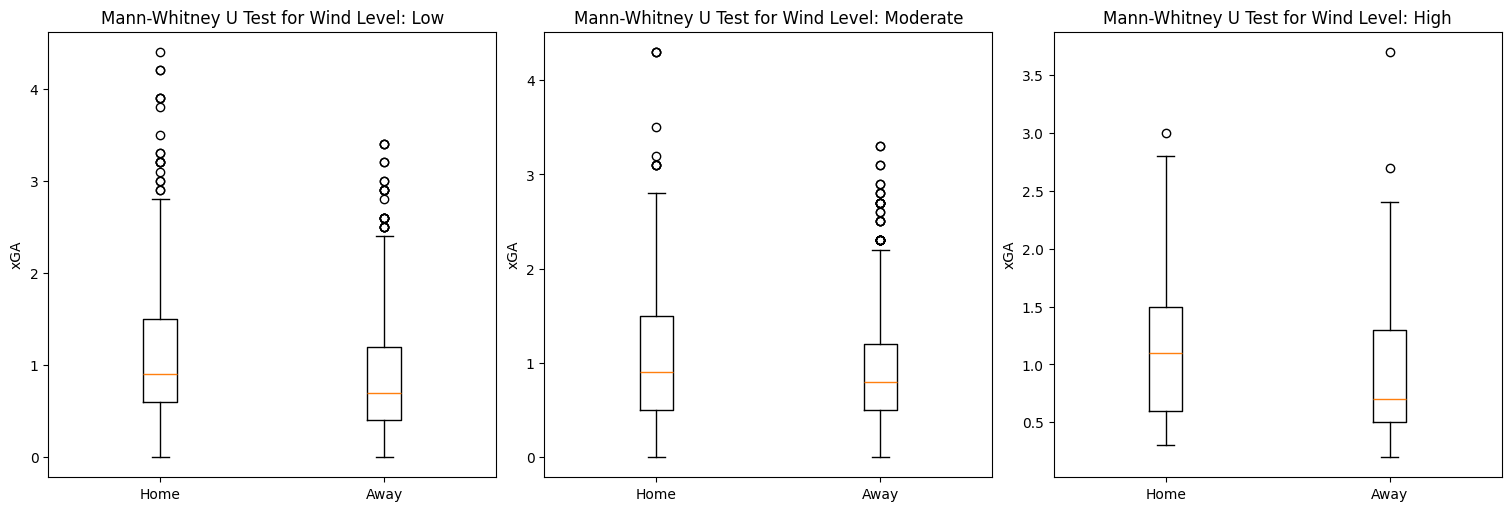

In [38]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
Temp_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Humidity','Test Type', 'Statistic', 'P-Value','Significant Difference'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True)

for i, home_level in enumerate(Temp_levels):
    home_data = df[df["Wind"] == home_level]["xGA_Home"]
    away_data = df[df["Wind"] == home_level]["xGA_Away"]

    # Check for normality
    home_normality = normaltest(home_data)
    away_normality = normaltest(away_data)

    if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
        # Perform z-test if both samples are normally distributed
        test_type = 'Z-Test'
        z_stat, p_value = ztest(home_data, away_data)
        stat = z_stat
    else:
        # Perform Mann-Whitney U test if at least one sample is not normally distributed
        test_type = 'Mann-Whitney U Test'
        u_stat, p_value = mannwhitneyu(home_data, away_data)
        stat = u_stat

    significant_diff = "Yes" if p_value < 0.05 else "No"

    new_row = pd.DataFrame([{'Wind': home_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
    results = pd.concat([results, new_row], ignore_index=True)

    # Plot the data
    axes[i].boxplot([home_data, away_data], tick_labels=['Home', 'Away'])
    axes[i].set_title(f'{test_type} for Wind Level: {home_level}')
    axes[i].set_ylabel('xGA')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()
